<a href="https://colab.research.google.com/github/SayumiAmarasinghe/Watchdog/blob/main/Copy_of_CSAF_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Business Problem**: To make use of the dataset and class columns in order to detect network attacks as an anomaly or not (binary classification problem)

Features:
Label:

In [ ]:
!pip install klib
!pip install lazypredict

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import klib as kl
from pandas.api.types import is_numeric_dtype
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [ ]:
#from google.colab import files
#uploaded = files.upload()  # This will allow you to upload both files

In [ ]:
file_path = '/content/Train_data.csv'
df = pd.read_csv(file_path)


In [ ]:
df.shape

(25192, 42)

In [ ]:
df.head(50)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
5,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
6,0,tcp,private,S0,0,0,0,0,0,0,...,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
7,0,tcp,private,S0,0,0,0,0,0,0,...,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
9,0,tcp,private,S0,0,0,0,0,0,0,...,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [ ]:
df.nunique()

,0
duration,758
protocol_type,3
service,66
flag,11
src_bytes,1665
dst_bytes,3922
land,2
wrong_fragment,3
urgent,2
hot,22


In [ ]:
df.describe(include='all')


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
count,25192.000000,25192,25192,25192,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192
unique,NaN,3,66,11,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,tcp,http,SF,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal
freq,NaN,20526,8003,14973,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13449
mean,305.054104,NaN,NaN,NaN,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,...,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769,NaN
std,2686.555640,NaN,NaN,NaN,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,...,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333,NaN
min,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,NaN,NaN,NaN,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,...,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,0.000000,NaN,NaN,NaN,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,NaN


In [ ]:
df['class'].value_counts()

,count
class,
normal,13449
anomaly,11743


In [ ]:
df.isnull().sum().sum()

0

In [ ]:

def count_outliers(df):
    outlier_counts = {}
    for column in df.select_dtypes(include=[np.number]).columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)

        # Calculate IQR
        IQR = Q3 - Q1

        # Determine outliers using the 1.5 * IQR rule
        lower_bound = Q1 - 100 * IQR
        upper_bound = Q3 + 100 * IQR

        # Count the number of outliers
        outlier_condition = (df[column] < lower_bound) | (df[column] > upper_bound)
        outlier_counts[column] = outlier_condition.sum()  # Number of outliers in the column

    return outlier_counts

# Get the count of outliers for each column
outliers_count = count_outliers(df)

# Print outlier count for each column
for col, count in outliers_count.items():
    print(f'Number of outliers in {col}: {count}')


Number of outliers in duration: 2024
Number of outliers in src_bytes: 327
Number of outliers in dst_bytes: 73
Number of outliers in land: 2
Number of outliers in wrong_fragment: 224
Number of outliers in urgent: 1
Number of outliers in hot: 520
Number of outliers in num_failed_logins: 23
Number of outliers in logged_in: 0
Number of outliers in num_compromised: 272
Number of outliers in root_shell: 39
Number of outliers in su_attempted: 21
Number of outliers in num_root: 134
Number of outliers in num_file_creations: 66
Number of outliers in num_shells: 9
Number of outliers in num_access_files: 79
Number of outliers in num_outbound_cmds: 0
Number of outliers in is_host_login: 0
Number of outliers in is_guest_login: 230
Number of outliers in count: 0
Number of outliers in srv_count: 0
Number of outliers in serror_rate: 0
Number of outliers in srv_serror_rate: 0
Number of outliers in rerror_rate: 3207
Number of outliers in srv_rerror_rate: 3233
Number of outliers in same_srv_rate: 0
Number

In [ ]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR

    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)].copy()

    return df_filtered

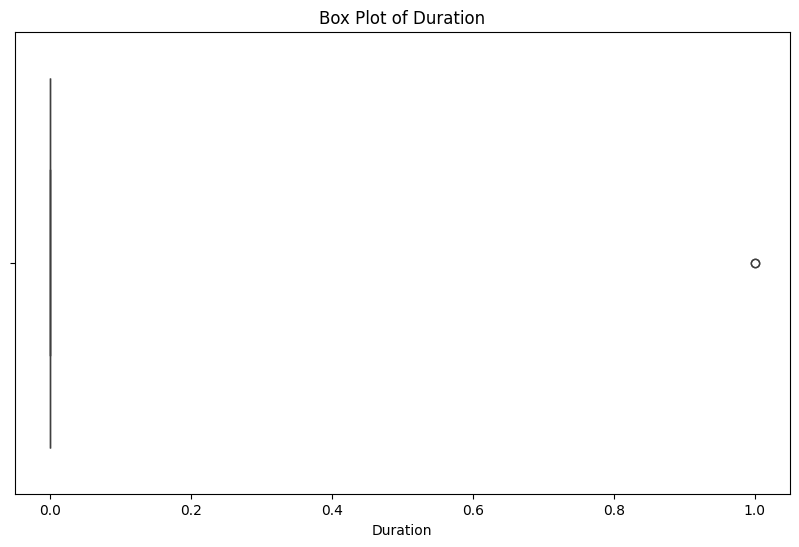

In [ ]:

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['land'])
plt.title('Box Plot of Duration')
plt.xlabel('Duration')
plt.show()


In [ ]:
df_cleaned = remove_outliers(df, 'duration')

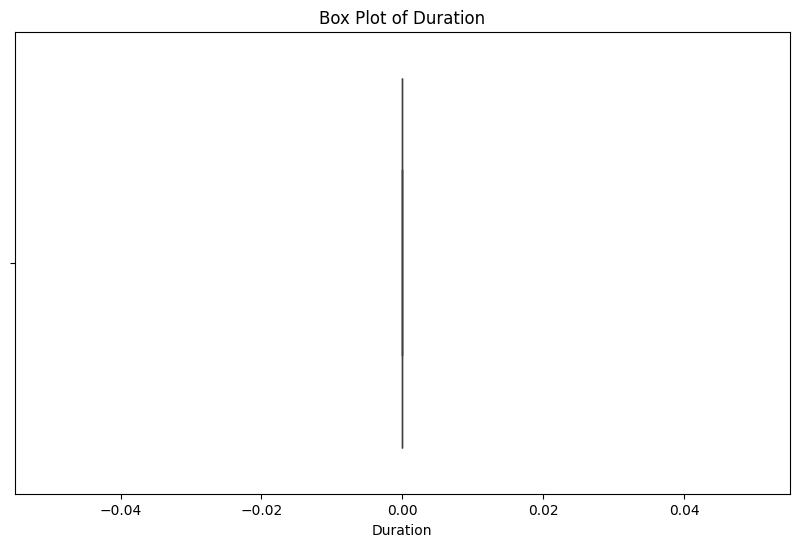

In [ ]:
# Example for visualizing outliers in 'duration' column
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_cleaned['duration'])
plt.title('Box Plot of Duration')
plt.xlabel('Duration')
plt.show()

In [ ]:
#Checking the unique value counts in columns
featureValues={}
for d in df.columns.tolist():
    count=df[d].nunique()
    if count==1:
        featureValues[d]=count
# List of columns having same 1 unique value
#drop them bc variance will be 0
cols_to_drop= list(featureValues.keys())
print("Columns having 1 unique value are :n",cols_to_drop)

Columns having 1 unique value are :n ['num_outbound_cmds', 'is_host_login']


In [ ]:
df.drop('num_outbound_cmds', inplace=True, axis = 1 )

In [ ]:
df.drop('is_host_login', inplace=True, axis = 1 )

In [ ]:
df.head(50)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
5,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
6,0,tcp,private,S0,0,0,0,0,0,0,...,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
7,0,tcp,private,S0,0,0,0,0,0,0,...,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
9,0,tcp,private,S0,0,0,0,0,0,0,...,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [ ]:
#Checking null percentage
df.isnull().mean()*100

,0
duration,0.0
protocol_type,0.0
service,0.0
flag,0.0
src_bytes,0.0
dst_bytes,0.0
land,0.0
wrong_fragment,0.0
urgent,0.0
hot,0.0


In [ ]:
#there are no missing values, so no need to impute any values

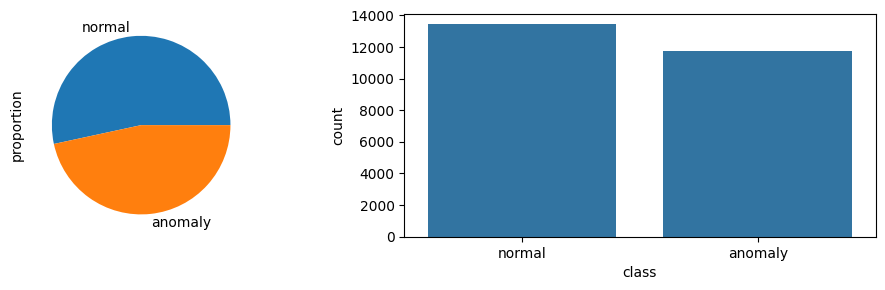

In [ ]:
# cchart for distribution of target variable
fig= plt.figure(figsize=(10,3) )
fig.add_subplot(1,2,1)
a= df['class'].value_counts(normalize=True).plot.pie()
fig.add_subplot(1,2,2)
churnchart=sns.countplot(x=df['class'])
plt.tight_layout()
plt.show()
#Let’s look at the distribution of the target variable in the dataset
#shows the difference between normal and anomaly count

In [ ]:
#Let’s visualize if there is any relationship between the target variable (anomaly, normal) and other variables

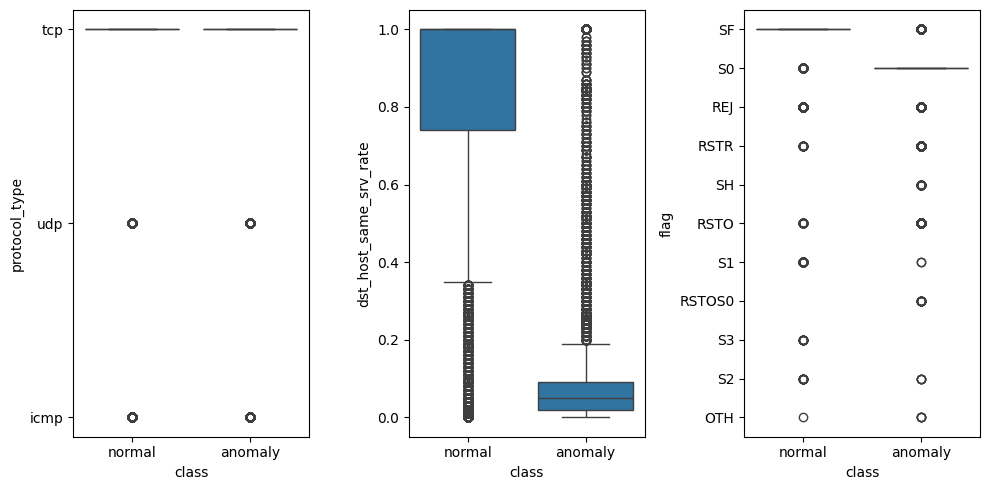

In [ ]:
# Visualize relationship between promoted and other features
fig= plt.figure(figsize=(10,5) )
fig.add_subplot(1,3,1)
ar_6=sns.boxplot(x=df["class"],y=df["protocol_type"])
fig.add_subplot(1,3,2)
ar_6=sns.boxplot(x=df["class"],y=df["dst_host_same_srv_rate"])
fig.add_subplot(1,3,3)
ar_6=sns.boxplot(x=df["class"],y=df["flag"])
plt.tight_layout()
plt.show()

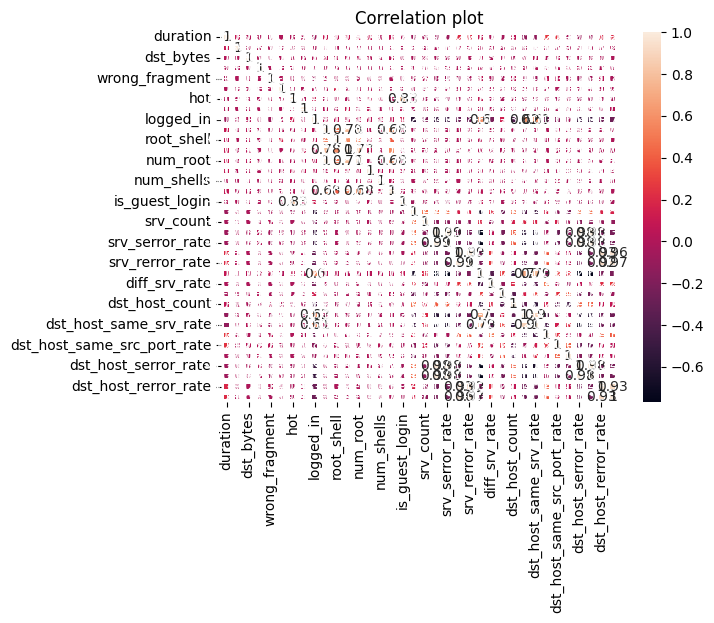

In [ ]:
#correlation between features
numeric_df = df.select_dtypes(include=['number'])
corr_plot = sns.heatmap(numeric_df.corr(),annot = True,linewidths=3 )
plt.title("Correlation plot")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
#split data into dependent variables(X) and independent variable(y) that we would predict
y = df.pop("class")
X = df
#Let’s split X and y using Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,train_size=0.8)
#get shape of train and test data
#It displays the size of the dataframe
#with the help of the shape variable, we can see thes ize of the columsn in the dataframe

print("train size X : ",X_train.shape)
print("train size y : ",y_train.shape)
print("test size X : ",X_test.shape)
print("test size y : ",y_test.shape)

train size X :  (20153, 39)
train size y :  (20153,)
test size X :  (5039, 39)
test size y :  (5039,)


In [ ]:
X_test

array([[-0.11552397, -0.00985831, -0.04037157, ..., -0.02336926,
         0.82341868, -0.04171014],
       [-0.11552397, -0.01024148, -0.04037157, ..., -0.02336926,
        -1.21444901, -0.04171014],
       [-0.11552397, -0.01024148, -0.04037157, ..., -0.02336926,
        -1.21444901, -0.04171014],
       ...,
       [-0.11552397, -0.01009519,  0.0337731 , ..., -0.02336926,
         0.82341868, -0.04171014],
       [-0.11552397, -0.0101869 ,  0.11247708, ..., -0.02336926,
         0.82341868, -0.04171014],
       [-0.11552397, -0.01012601, -0.03395963, ..., -0.02336926,
         0.82341868, -0.04171014]])

In [ ]:
y_test

,class
19064,anomaly
11127,normal
6517,anomaly
2973,normal
13339,anomaly
...,...
16632,normal
360,normal
14748,normal
2910,normal


In [ ]:
#20153 observations in train, 5039 observations in test

In [ ]:
#feature scaling: Using feature scaling,
#we bring all the features into the same range.
#There are many ways to do feature scaling, such as normalization, standardization, robust scaling, min-max scaling, etc. Here, we will discuss the standardization technique we will apply to our features.

#In standardization, scale features have a mean of 0 and a standard deviation of 1.
#It does not scale to a preset range.
#Scale features using the formula below:

In [ ]:
df = pd.get_dummies(df, columns=df.select_dtypes(include=['object']).columns.tolist())

In [ ]:
# 3. Identify categorical and numerical features
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()  # Assuming object type for strings
numerical_features = X_train.select_dtypes(include=['number']).columns.tolist()

# 4. Create transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))  # sparse=False for compatibility with StandardScaler
])

# 5. Create a ColumnTransformer to apply transformers to respective columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# 6. Create a pipeline with preprocessing and your model (if applicable)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    # ('classifier', YourClassifier())  # Add your classifier here
])

# 7. Fit and transform the data
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)


In [ ]:
"""
Using feature scaling, we bring all the features into the same range.
 There are many ways to do feature scaling, such as normalization, standardization, robust scaling,
 min-max scaling, etc. Here, we will discuss the standardization technique we will apply to our features.

In standardization, scale features have a mean of 0 and a standard deviation of 1.
It does not scale to a preset range. Scale features using the formula below:
z = (x – u) / s
"""

#Feature scaling
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [ ]:
#When a dataset exhibits a class imbalance problem,
#one category has more data points than another.
#This imbalance skews the distribution of class labels.
#Let’s examine whether our dataset faces a class imbalance issue.

#check for distribution of labels
y_train.value_counts(normalize=True)

,proportion
class,
normal,0.53466
anomaly,0.46534


In [ ]:
#it doesn't really look like there's a class imbalance?
#so check the error metrics for accuracy, precision, and f1 score
def print_error_metrics(y_test, y_pred):
    acc = metrics.accuracy_score(y_test, y_pred)
    prc = metrics.precision_score(y_test, y_pred, pos_label='anomaly')
    f1 = metrics.f1_score(y_test, y_pred, pos_label='anomaly')
    print('Accuracy: {:.5f}'.format(acc))
    print('Precision: {:.5f}'.format(prc))
    print('F1 Score: {:.5f}'.format(f1))

In [ ]:
regressor = LogisticRegression(max_iter=100, penalty=None)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print_error_metrics(y_test, y_pred)

Accuracy: 0.97599
Precision: 0.97867
F1 Score: 0.97430


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#import library
from sklearn.linear_model import LogisticRegression
#make instance of model with default parameters except class weight
#as we will add class weights due to class imbalance problem
lr_basemodel =LogisticRegression(class_weight={'normal':0.1, 'anomaly':0.9}) # Use actual class labels
# train model to learn relationships between input and output variables
lr_basemodel.fit(X_train,y_train)

LogisticRegression(class_weight={'anomaly': 0.9, 'normal': 0.1})

In [ ]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
#Hyperparameter tuning
# define model/create instance
lr=LogisticRegression()
#tuning weight for minority class then weight for majority class will be 1-weight of minority class
#Setting the range for class weights
weights = np.linspace(0.0,0.99,20)
#specifying all hyperparameters with possible values
# Changed 'penalty' to only include 'l2' to be compatible with the default 'lbfgs' solver
# Changed 'class_weight' to use class labels instead of numerical indices
param= {'C': [0.1, 0.5, 1,10,15,20], 'penalty': ['l2'], "class_weight":[{  'anomaly':x ,'normal':1.0 -x} for x in weights]}
# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
#Gridsearch for hyperparam tuning
model= GridSearchCV(estimator= lr,param_grid=param,scoring="f1",cv=folds,return_train_score=True)
#train model to learn relationships between x and y
model.fit(X_train,y_train)

Streaming output truncated to the last 5000 lines.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_response.py", line 204, in _get_response_values
    raise ValueError(
ValueError: pos_label=1 is not a valid label: It should be one of ['anomaly' 'normal']

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/di

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1, 10, 15, 20],
                         'class_weight': [{'anomaly': 0.0, 'normal': 1.0},
                                          {'anomaly': 0.05210526315789474,
                                           'normal': 0.9478947368421052},
                                          {'anomaly': 0.10421052631578948,
                                           'normal': 0.8957894736842105},
                                          {'anomaly': 0.1563157894736842,
                                           'normal': 0.843...
                                           'normal': 0.2705263157894737},
                                          {'anomaly': 0.781578947368421,
                                           'normal': 0.21842105263157896},
                                          {'anomaly': 0.8336842105263158,
                                           'normal': 0.1663157894736842},
                                          {'anomaly': 0.8857894736842106,
                                           'normal': 0.11421052631578943},
                                          {'anomaly': 0.9378947368421053,
                                           'normal': 0.06210526315789466},
                                          {'anomaly': 0.99,
                                           'normal': 0.010000000000000009}],
                         'penalty': ['l2']},
             return_train_score=True, scoring='f1')

In [ ]:
y_pred = mylr.predict(X_test)

y_pred

array(['anomaly', 'normal', 'anomaly', ..., 'normal', 'normal', 'normal'],
      dtype=object)

In [ ]:
# print best hyperparameters
print("Best hyperparameters: ", model.best_params_)


Best F1 score:  nan
Best hyperparameters:  {'C': 0.1, 'class_weight': {'anomaly': 0.0, 'normal': 1.0}, 'penalty': 'l2'}


In [ ]:
#Building Model again with best params
lr2=LogisticRegression(class_weight={'anomaly': 0.27, 'normal': 0.73}, C=20, penalty="l2")
lr2.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=20, class_weight={'anomaly': 0.27, 'normal': 0.73})

In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score
# predict probabilities on Test and take probability for class 1 (for 'anomaly')
y_pred_prob_test = lr2.predict_proba(X_test)[:, 1]

# predict labels on test dataset
y_pred_test = lr2.predict(X_test)

# create confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix is:\n\n", cm)
print("\n")

# ROC-AUC score
print("ROC-AUC score (test dataset):\t", roc_auc_score(y_test, y_pred_prob_test))

# Precision score
# Assuming 'anomaly' is the positive class
print("Precision score (test dataset):\t", precision_score(y_test, y_pred_test, pos_label='anomaly'))

# Recall Score
print("Recall score (test dataset):\t", recall_score(y_test, y_pred_test, pos_label='anomaly'))

# f1 score
print("f1 score (test dataset):\t", f1_score(y_test, y_pred_test, pos_label='anomaly'))


Confusion Matrix is:

 [[2256  109]
 [  25 2649]]


ROC-AUC score (test dataset):	 0.9958398231501847
Precision score (test dataset):	 0.9890398947829899
Recall score (test dataset):	 0.9539112050739957
f1 score (test dataset):	 0.9711579853637538


In [ ]:
from sklearn import metrics
print('Accuracy of the model: ', metrics.accuracy_score(y_test, y_pred)*100, '%')

Accuracy of the model:  97.59872990672753 %
